# トピックモデルの実践

ここでは、一橋大学ニュースのデータを使って、LDAでトピックを見ていきます。

- 単語化したリストは、さきほど、pickleで保存したデータを使う
- Bag-of-Wordsには、sklearnのCountVectorizerを使う
- LDAは、sklearnのLatentDirichletAllocationを使う

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sklearnから必要なアルゴリズムをインポート

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 辞書オブジェクトを復元

pickleで保存した、単語を格納した辞書オブジェクトを復元します。

In [3]:
import pickle

In [4]:
with open("docs_words.picke", "rb") as f:
    docs_words = pickle.load(f)

Colabで実行しているとエラーになるので、2項で実行した結果のファイルをダウンロードして、Colabのランタイムに `docs_words.picke` を登録

In [5]:
type(docs_words)

dict

In [6]:
docs_words[0][:10]

['ソニー',
 'パナソニック',
 '富士通',
 '資生堂',
 '共同',
 'デザイン組織',
 '共通評価指標',
 '検討',
 '作成',
 '2021年4月30日']

In [7]:
len(docs_words)

34

# Bag-of-Words

単語のベクトル化を行います。

文書 x 単語の疎行列 を作りデータの中を確認します。

In [8]:
tf_vectorizer = CountVectorizer()

In [9]:
docs_texts = np.array([" ".join(w) for w in docs_words.values()])

In [10]:
docs_texts[0][:20]

'ソニー パナソニック 富士通 資生堂 共'

In [11]:
tf = tf_vectorizer.fit_transform(docs_texts)

In [12]:
len(tf_vectorizer.vocabulary_)

1568

In [13]:
len(tf_vectorizer.get_feature_names_out())

1568

In [14]:
tf_vectorizer.get_feature_names_out()[:10]

array(['00', '00開演', '00開演開催方法zoomウェビナー', '042', '10', '100名', '10分',
       '10回中曽根康弘奨励賞', '10年あまり', '10月頃'], dtype=object)

In [15]:
tf.shape

(34, 1568)

In [16]:
df = pd.DataFrame(tf.toarray(), columns=tf_vectorizer.get_feature_names_out())

In [17]:
df.head()

,00,00開演,00開演開催方法zoomウェビナー,042,10,100名,10分,10回中曽根康弘奨励賞,10年あまり,10月頃,...,青木人志理事,頂く,順不同,順位機関名採択率,題す,駿河台大学法文学部教授,高い,高度,高等教育,魅力
0,2,0,0,6,1,1,1,0,1,1,...,2,2,0,1,1,1,10,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
"042" in docs_texts[0]

True

# LDAでトピックに分類

36 × 1511 の行列を、次元削減する。

特徴量が 1511　となっていて、データ数が36ということになる。

この多数ある特徴量を5トピックにすることで、36個の文書をどのトピックに所属しているかを見ていく

In [19]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics).fit(tf)

各トピックが持つ単語分布

In [20]:
lda.components_

array([[8.8358468 , 0.20272794, 0.20272794, ..., 0.20310714, 0.20249487,
        0.20360624],
       [0.9870596 , 0.20312318, 0.20312319, ..., 0.20502274, 0.20624524,
        1.31745525],
       [2.77282724, 1.19046646, 1.19046644, ..., 0.20543894, 0.20000023,
        3.07430296],
       [0.20126047, 0.2016487 , 0.2016487 , ..., 0.2011401 , 0.20000028,
        0.20040361],
       [0.20300589, 0.20203372, 0.20203372, ..., 4.18529108, 2.19125939,
        0.20423194]])

In [21]:
lda.components_.shape

(5, 1568)

文書の特徴量をトピックで表す

In [22]:
transformed = lda.transform(tf)

In [23]:
transformed.shape

(34, 5)

In [24]:
transformed[0]

array([1.57013686e-01, 6.46965853e-01, 7.36745118e-05, 1.01505511e-04,
       1.95845281e-01])

In [25]:
transformed[1]

array([0.00540947, 0.00543517, 0.00541452, 0.97832103, 0.00541981])

文書がどのトピックに所属しているかをグラフで表現

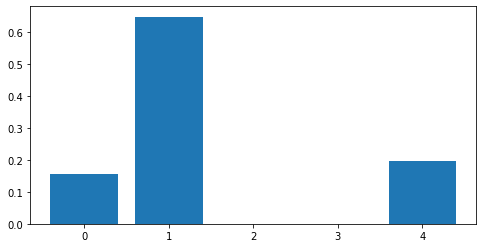

In [26]:
doc_id = 0

plt.figure(figsize=(8, 4))
topics = range(len(transformed[doc_id]))
plt.bar(topics, height=transformed[doc_id], width=0.8)
plt.xticks(topics)
plt.show()

トピックに所属する文書を確認する

In [27]:
def topic_summary(transformed, topic_id):
    indexes = np.argsort(transformed[:, topic_id])[::-1][:5]
    print(indexes)
    docs = docs_texts[indexes]
    for i, doc in enumerate(docs):
        print(f"{i}: {indexes[i]} : {doc[:200]}")
        print("===")

In [28]:
topic_summary(transformed, 2)

[28  9 30 11 17]
0: 28 : 独立行政法人日本学生支援機構 発行 する ソーシャルボンド 投資 2021年2月8日国立大学法人一橋大学 たび 独立行政法人日本学生支援機構(jasso) 発行 する ソーシャルボンド 62回日本学生支援債券) 投資 おこなう ソーシャルボンド 社会的課題 解決 資する プロジェクト(ソーシャルプロジェクト) 資金調達 発行 する れる 債券 esg投資(※) 対象 なる 債券 債券 発行 調達資
===
1: 9 : 独立行政法人日本学生支援機構 発行 する ソーシャルボンド 投資 2021年2月8日国立大学法人一橋大学 たび 独立行政法人日本学生支援機構(jasso) 発行 する ソーシャルボンド 62回日本学生支援債券) 投資 おこなう ソーシャルボンド 社会的課題 解決 資する プロジェクト(ソーシャルプロジェクト) 資金調達 発行 する れる 債券 esg投資(※) 対象 なる 債券 債券 発行 調達資
===
2: 30 : 令和2年司法試験 結果 2021年1月28日法科大学院修了者 対象 する 令和2年司法試験 合格者 1月20日 法務省 発表 する れる 本学法科大学院修了者119人 試験 挑む うち84人 合格 する 本学 合格率 70.59% 全国 法科大学院 中 合格率2位 なる 今回 試験全体 合格者数 1,450人 合格率 39.2% 令和2年司法試験結果 合格率順(合格者/受験者) 1月20日発表(一
===
3: 11 : 令和2年司法試験 結果 2021年1月28日法科大学院修了者 対象 する 令和2年司法試験 合格者 1月20日 法務省 発表 する れる 本学法科大学院修了者119人 試験 挑む うち84人 合格 する 本学 合格率 70.59% 全国 法科大学院 中 合格率2位 なる 今回 試験全体 合格者数 1,450人 合格率 39.2% 令和2年司法試験結果 合格率順(合格者/受験者) 1月20日発表(一
===
4: 17 : 関西 中部合同アカデミア 2020年度一橋大学関西 中部合同アカデミア 局面 入る 米中 戦略的競争 日本 2021年2月27日(土)、「 局面 入る 米中 戦略的競争 日本 テーマ 2020年度関西 中部合同アカデミア オンラインセミナー 開催 

文書からみて、同じトピックになっているものを見つける

In [29]:
transformed[0].argmax()

1

In [30]:
transformed[:, 1]>0.5

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False])

関数化して同じトピックの確率が高いものを出力

In [31]:
def same_topic_docs(transformed, docs_texts, doc_id):
    index = transformed[doc_id].argmax()
    docs = docs_texts[transformed[:, index]>0.5]
    print(f"Number of same topic: index={index}, size={docs.size}")
    print()
    for i, doc in enumerate(docs):
        print(f"{i}: {doc[:200]}")
        print("===")

In [32]:
same_topic_docs(transformed, docs_texts, 0)

Number of same topic: index=1, size=6

0: ソニー パナソニック 富士通 資生堂 共同 デザイン組織 共通評価指標 検討 作成 2021年4月30日 経営管理研究科内 設置 する データ デザイン研究センター ソニーグループ株式会社クリエイティブセンター パナソニック株式会社デザイン本部 富士通株式会社デザインセンター 株式会社資生堂クリエイティブ本部 共同 社内デザイン組織 活動 成果 共通 視点 量的 評価 する 指標 検討 作成 する
===
1: cambridge economic history modern world(stephen broadberryオックスフォード大学教授 深尾京司経済研究所特任教授編) 出版 する れる 2021年4月19日2018年8月 開催 する 4回 hitotsubashi summer institute 内 ブック・コンファレンス 行う 世界経済史研究 cambridge economic his
===
2: 学業優秀学生(卒業生) 表彰 行う れる 2021年3月22日学業優秀学生(卒業生) 表彰 行う 3月18日(木)、 会議室 令和2年度学業優秀学生表彰 行う これ 在学期間中 優秀 成績 残す 学生 学部1名 卒業年次 表彰 する もの 一橋大学基金 財源 する いる 表彰状 他 記念品 腕時計 贈呈 する 表彰 する 学生 次 4名 商学部 池永 進之佑経済学部 大澤 也法学部 室田 茉悠花社
===
3: ソニー パナソニック 富士通 資生堂 共同 デザイン組織 共通評価指標 検討 作成2021年4月30日 経営管理研究科内 設置 する データ デザイン研究センター ソニーグループ株式会社クリエイティブセンター パナソニック株式会社デザイン本部 富士通株式会社デザインセンター 株式会社資生堂クリエイティブ本部 共同 社内デザイン組織 活動 成果 共通 視点 量的 評価 する 指標 検討 作成 する 
===
4: cambridge economic history modern world(stephen broadberryオックスフォード大学教授 深尾京司経済研究所特任教授編) 出版 する れる 2021年4月19日2018年8月 開催 する 4回 hit